In [33]:
import matplotlib.pyplot as plt

In [34]:
import time



In [35]:
class Vertex:
    def __init__(self,x_coord, y_coord,next_index, prev_index, index):
        self.x = x_coord
        self.y = y_coord
        self.next = next_index
        self.prev = prev_index
        self.index = index


In [36]:
class Polygon:
    def __init__(self, filename):
        self.x_coords = []
        self.y_coords = []
        self.vertex_list = []
        with open(filename, 'r') as file:
            for line in file:
                parts = line.strip().split()
                num_vertices = int(parts[0])
                #print(num_vertices)
                for i in range(num_vertices):
                    x_str, y_str = parts[2 * i + 1], parts[2 * i + 2]
                    num, dem = map(int, x_str.split('/'))
                    x_coord = num / dem
                    self.x_coords.append(x_coord)
                    num, dem = map(int, y_str.split('/'))
                    y_coord = num / dem
                    self.y_coords.append(y_coord)
                    self.vertex_list.append(Vertex(x_coord, y_coord, (i+1)%num_vertices, (i-1)%num_vertices , i))
    
    def plot(self,triangles = None):
        plt.figure()
        plt.plot(self.x_coords + [self.x_coords[0]], self.y_coords + [self.y_coords[0]], marker='o')
        plt.fill(self.x_coords, self.y_coords, alpha=0.3)
        if triangles:
            for tri in triangles:
                tri_x = [tri[0].x, tri[1].x, tri[2].x, tri[0].x]
                tri_y = [tri[0].y, tri[1].y, tri[2].y, tri[0].y]
                plt.plot(tri_x, tri_y, 'r-')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

        
    def triangulate(self):
        triangles = []
        vertices = self.vertex_list[:]
        
        while len(vertices) > 3:
            for i in range(len(vertices)):
                prev_index = (i - 1) % len(vertices)
                next_index = (i + 1) % len(vertices)
                
                ear_found = self.ear(vertices[prev_index], vertices[i], vertices[next_index],vertices)
                if ear_found:
                    triangles.append((vertices[prev_index], vertices[i], vertices[next_index]))
                    #self.plot(triangles)
                    vertices.pop(i)
                    break
        
        triangles.append((vertices[0], vertices[1], vertices[2]))

        return triangles
    
    def ear(self, prev_vertex, ear_vertex, next_vertex, vertices):
        if self.convex(prev_vertex, ear_vertex, next_vertex):
            for v in vertices:
                if v != prev_vertex and v != ear_vertex and v != next_vertex:
                    if self.inTriangle(v, prev_vertex, ear_vertex, next_vertex):
                        return False
            return True
        return False
    
    def convex(self, prev_vertex, curr_vertex, next_vertex):
        return self.vetorialProduct(prev_vertex, curr_vertex, next_vertex) > 0
    
    def vetorialProduct(self, v1, v2, v3):
        return (v2.x - v1.x) * (v3.y - v1.y) - (v2.y - v1.y) * (v3.x - v1.x)
    

    
    def inTriangle(self, v, v1, v2, v3):
        d1 = self.aux(v, v1, v2)
        d2 = self.aux(v, v2, v3)
        d3 = self.aux(v, v3, v1)
        return not ((d1 < 0 or d2 < 0 or d3 < 0) and (d1 > 0 or d2 > 0 or d3 > 0))
    
    def aux(self, v1, v2, v3):
        return (v1.x - v3.x) * (v2.y - v3.y) - (v2.x - v3.x) * (v1.y - v3.y)
    


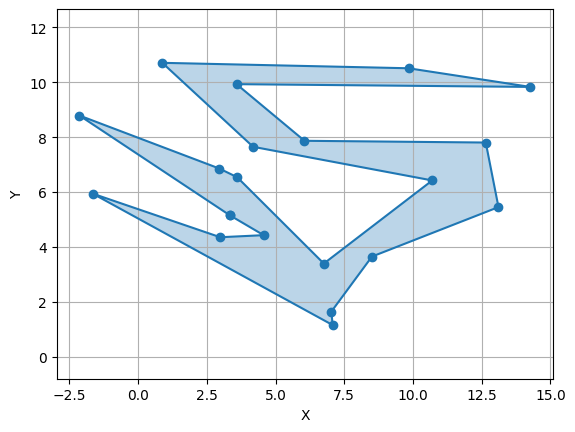

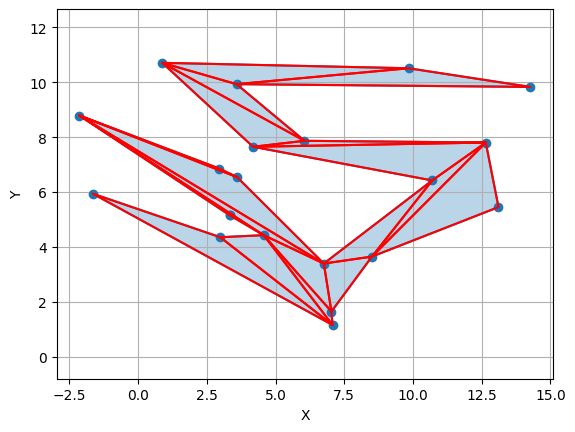

tempo levado: 0.0003


In [37]:
input = 'agp2009a-simplerand/randsimple-20-1.pol'
poly = Polygon(input)
poly.plot()
t_i = time.time()
triangulate = poly.triangulate()
t_f = time.time()
poly.plot(triangulate)
print(f"tempo levado: {(t_f-t_i):.4f}")

Referências:

https://www.geeksforgeeks.org/timing-functions-with-decorators-python/
https://www.geometrictools.com/Documentation/TriangulationByEarClipping.pdf
https://github.com/yaugenst/triangulation/tree/master
